In [153]:
%matplotlib inline

In [154]:
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata
import numpy as np
import cv2

## file path checking function

In [155]:
import os
import errno

def make_sure_path_exists(path):
    """Check if the directory a file is going to be written to exists, and if not, create the directory."""
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

## imgCopy Function

In [156]:
def imgCopy(img):
    """
    Returns a copy of the input image
    """
    return sitk.Image(img)

## Getting TIFF stacks Function
https://github.com/NeuroDataDesign/seelviz/blob/gh-pages/Jupyter/3D%20TIFF%20stack.ipynb

In [157]:
import os
import numpy as np
from PIL import Image
import nibabel as nib
import scipy.misc

def generate_tiff(file_path, token):

    # TokenName = 'Fear197ds10.nii'
#     token = file_path.split('.')[0]
    img = nib.load(file_path)

    ## Sanity check for shape
    img.shape

    ## Convert into np array (or memmap in this case)
    data = img.get_data()
    print data.shape
    print type(data)


    plane = 0;
    
    dir_name = 'tiffs_' + token


    ##Iterate through all planes to get slices
    for plane in range(data.shape[0]):
        ## Convert memmap array into ndarray for toimage process
        output = np.asarray(data[plane])
        ## Save as TIFF for Ilastik
        outfile_path = dir_name + '/' + token + "_" + str(plane) + '.tiff'
#         scipy.misc.imsave(outfile_path, output)
        make_sure_path_exists(dir_name)
        scipy.misc.toimage(output).save(outfile_path)
        
    return dir_name
        

## Download the brain

In [158]:
inToken = "Fear199"

nd = neurodata()
print(nd.get_metadata(inToken)['dataset']['voxelres'].keys())

[u'1', u'0', u'3', u'2', u'5', u'4']


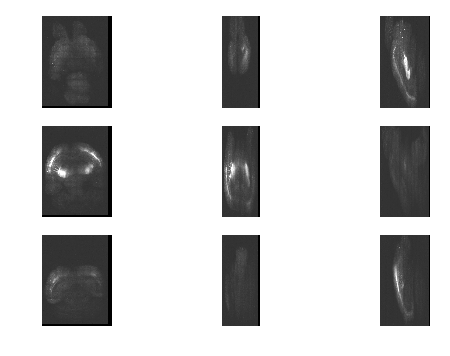

In [159]:
inImg = imgDownload(inToken, resolution=5)
imgShow(inImg, vmax=500)

In [160]:
inImg_backup = imgCopy(inImg)

In [182]:
print(inImg_backup.GetSpacing())

(0.01872, 0.01872, 0.005)


In [130]:
print(inImg_backup)

Image (0x7fe9001d0af0)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 2
  Modified Time: 5598
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 5585
  UpdateMTime: 5594
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [540, 717, 1358]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [540, 717, 1358]
  RequestedRegion: 
    Dimension: 3
    Index: [405, 0, 0]
    Size: [1, 717, 1358]
  Spacing: [0.01872, 0.01872, 0.005]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.01872 0 0
0 0.01872 0
0 0 0.005

  PointToIndexMatrix: 
53.4188 0 0
0 53.4188 0
0 0 200

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x7fe909e7ca50)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned short>


In [132]:
temp = inImg_backup

In [133]:
print(temp)

Image (0x7fe9001d0af0)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 2
  Modified Time: 5598
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 5585
  UpdateMTime: 5594
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [540, 717, 1358]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [540, 717, 1358]
  RequestedRegion: 
    Dimension: 3
    Index: [405, 0, 0]
    Size: [1, 717, 1358]
  Spacing: [0.01872, 0.01872, 0.005]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.01872 0 0
0 0.01872 0
0 0 0.005

  PointToIndexMatrix: 
53.4188 0 0
0 53.4188 0
0 0 200

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x7fe909e7ca50)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned short>


In [168]:
# Run this to reset the img
inImg = inImg_backup

## downloading the refimg

In [161]:
refToken = "ara_ccf2"
refImg = imgDownload(refToken)

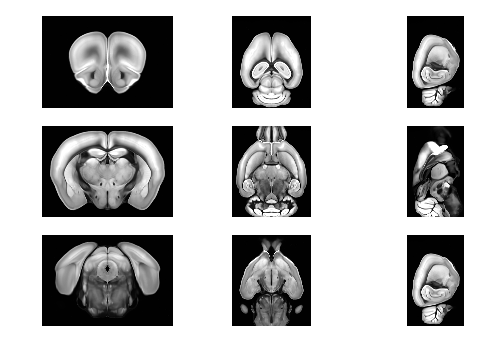

In [162]:
imgShow(refImg, vmax=500)

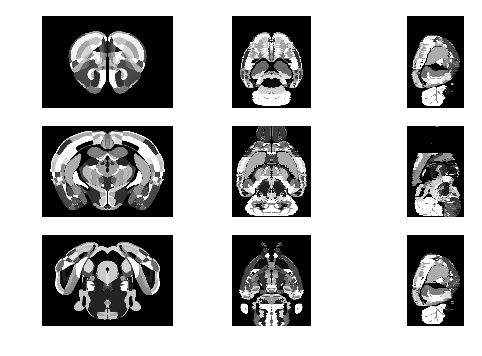

In [163]:
refAnnoImg = imgDownload(refToken, channel="annotation")
imgShow(refAnnoImg, vmax=1000)

In [164]:
print(refImg.GetSpacing())

(0.024999999999999998, 0.024999999999999998, 0.024999999999999998)


## Respacing

In [169]:
print(inImg.GetSpacing())

(0.01872, 0.01872, 0.005)


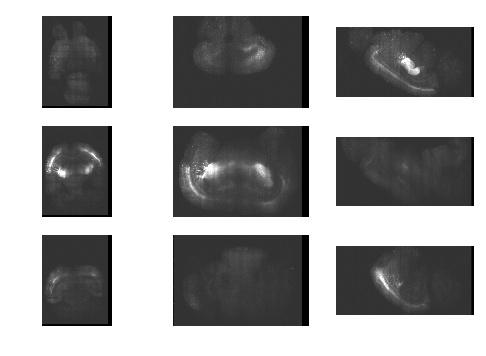

In [170]:
inImg = imgResample(inImg, spacing=refImg.GetSpacing())
imgShow(inImg, vmax=500)

## Reorienting 

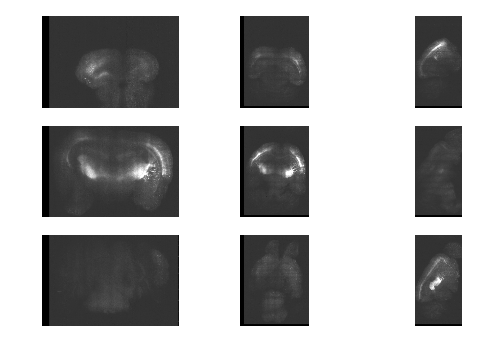

In [171]:
inImg = imgReorient(inImg, "LAI", "RSA")
imgShow(inImg, vmax=500)

In [172]:
inImg_reorient_backup = imgCopy(inImg)

In [141]:
temp = inImg_reorient_backup

In [142]:
print(temp)

Image (0x7fe908b5ab90)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 2
  Modified Time: 6830
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 6814
  UpdateMTime: 6827
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [405, 272, 537]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [405, 272, 537]
  RequestedRegion: 
    Dimension: 3
    Index: [304, 0, 0]
    Size: [1, 272, 537]
  Spacing: [0.025, 0.025, 0.025]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.025 0 0
0 0.025 0
0 0 0.025

  PointToIndexMatrix: 
40 0 0
0 40 0
0 0 40

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x7fe908b53b00)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned short>
      Reference Count:

In [143]:
print(inImg)

Image (0x7fe908b5ab90)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 2
  Modified Time: 6830
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 6814
  UpdateMTime: 6827
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [405, 272, 537]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [405, 272, 537]
  RequestedRegion: 
    Dimension: 3
    Index: [304, 0, 0]
    Size: [1, 272, 537]
  Spacing: [0.025, 0.025, 0.025]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.025 0 0
0 0.025 0
0 0 0.025

  PointToIndexMatrix: 
40 0 0
0 40 0
0 0 40

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x7fe908b53b00)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned short>
      Reference Count:

In [119]:
# restoring backup
inImg = inImg_reorient_backup

## Basic Thresholding

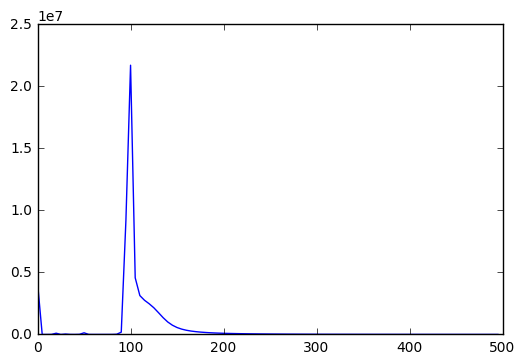

In [173]:
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

100


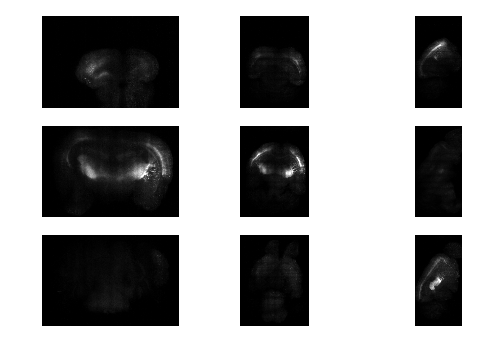

In [174]:
# lowerThreshold = 100
# upperThreshold = sitk.GetArrayFromImage(inImg).max()+1

# inImg = sitk.Threshold(inImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
# imgShow(inImg, vmax = 500)

counts = np.bincount(values)
maximum = np.argmax(bins)
print(maximum)
# print(counts)

lowerThreshold = maximum
upperThreshold = sitk.GetArrayFromImage(inImg).max()+1

inImg = sitk.Threshold(inImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
imgShow(inImg, vmax = 500)

In [175]:
sitk.GetArrayFromImage(inImg)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 3, 2, 0],
        [0, 0, 0, ..., 2, 0, 0],
        [0, 0, 0, ..., 0, 2, 0],
        ..., 
        [0, 0, 0, ..., 0, 2, 0],
        [0, 0, 0, ..., 5, 0, 0],
        [0, 0, 0, ..., 3, 0, 0]],

       [[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 2, 1],
        ..., 
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 2, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

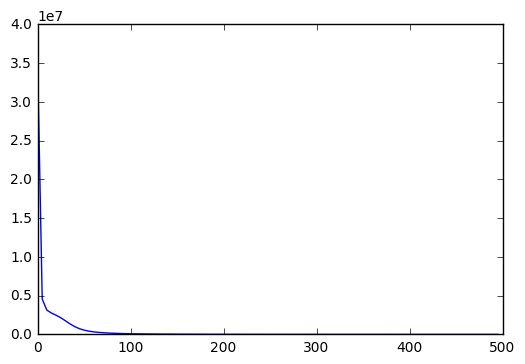

In [176]:
(values, bins) = np.histogram(sitk.GetArrayFromImage(inImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

## Setting spacing (downsampling)

In [177]:
spacingImg = inImg.GetSpacing()
spacing = tuple(i * 50 for i in spacingImg)
print(spacing)

(1.25, 1.25, 1.25)


In [178]:
inImg_ds = imgResample(inImg, spacing=spacing) 

## Saving the image to an .nii

In [179]:
location = "img/" + inToken + ".nii"
imgWrite(inImg, str(location))

## Saving downsampled image to an .nii

In [151]:
location = "img/" + inToken + "_ds.nii"
imgWrite(inImg_ds, str(location))

## Creating TIFF files

once the .nii is created, this can run

In [46]:
tiff_dir_name = generate_tiff("img/" + inToken + ".nii", inToken)

(540, 717, 1358)
<class 'numpy.core.memmap.memmap'>


## Local Histogram Equilization

In [109]:
def local_hist_eq(path, inToken):
    im = nib.load(path)

    im = im.get_data()
    img = im[:,:,:]

    shape = im.shape
    #affine = im.get_affine()

    x_value = shape[0]
    y_value = shape[1]
    z_value = shape[2]

    #####################################################

    imgflat = img.reshape(-1)

    #img_grey = np.array(imgflat * 255, dtype = np.uint8)

    #img_eq = exposure.equalize_hist(img_grey)

    #new_img = img_eq.reshape(x_value, y_value, z_value)
    #globaleq = nib.Nifti1Image(new_img, np.eye(4))

    #nb.save(globaleq, '/home/albert/Thumbo/AutAglobaleq.nii')

    ######################################################

    #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

    img_grey = np.array(imgflat * 255, dtype = np.uint8)
    #threshed = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

    cl1 = clahe.apply(img_grey)

    #cv2.imwrite('clahe_2.jpg',cl1)
    #cv2.startWindowThread()
    #cv2.namedWindow("adaptive")
    #cv2.imshow("adaptive", cl1)
    #cv2.imshow("adaptive", threshed)
    #plt.imshow(threshed)

    localimgflat = cl1 #cl1.reshape(-1)

    newer_img = localimgflat.reshape(x_value, y_value, z_value)
    localeq = nib.Nifti1Image(newer_img, np.eye(4))
    
    dir_name = 'histeq'
    make_sure_path_exists(dir_name)
    nib.save(localeq, dir_name + '/' + inToken + '_histeq.nii')

In [110]:
# actually running the local histogram equilization
path = "img/" + inToken + "_ds.nii"
local_hist_eq(path, inToken)

## working with .nii files

In [115]:
# full image
# temp_file_path = "img/" + inToken + ".nii"

# Downsampled image
# temp_file_path = "img/" + inToken + "_ds.nii"

# Histogram Equilized image
temp_file_path = "histeq/" + inToken + "_histeq.nii"

num_points = 7500

temp_img = nib.load(temp_file_path)

## Sanity check for shape
temp_img.shape

## Convert into np array (or memmap in this case)
temp_data = temp_img.get_data()
temp_shape = temp_img.shape
temp_max = np.max(temp_data)

print('shape:')
print temp_data.shape
print type(temp_data)

print('max:')
print(temp_max)

# print(temp_data)

temp_threshold = 0.025
filt = temp_data > temp_threshold * temp_max
# filt = temp_data

data_points = np.where(filt)
x = data_points[0]
y = data_points[1]
z = data_points[2]

intens = temp_data[filt]
intens = np.int16(255 * (np.float32(intens) / np.float32(temp_max)))

intens_shape = intens.shape

total_points = intens.shape[0]

fraction = num_points / float(total_points)

if fraction < 1.0:
    # np.random.random returns random floats in the half-open interval [0.0, 1.0)
    filt = np.random.random(size=intens_shape) < fraction
    print('v.shape:')
    print(intens_shape)
    print('x.size before filter: %d' % x.size)
    print('y.size before filter: %d' % y.size)
    print('z.size before filter: %d' % z.size)
    print('v.size before filter: %d' % intens.size)
    x = x[filt]
    y = y[filt]
    z = z[filt]
    intens = intens[filt]
    print('x.size after filter: %d' % x.size)
    print('y.size after filter: %d' % y.size)
    print('z.size after filter: %d' % z.size)
    print('v.size after filter: %d' % intens.size)


temp_points = np.vstack([x, y, z, intens])
temp_points = np.transpose(temp_points)
print("Num Points: %d"%(temp_points.shape[0]))


# plane = 0;


# ##Iterate through all planes to get slices
# for plane in range(data.shape[0]):
#     ## Convert memmap array into ndarray for toimage process
#     output = np.asarray(data[plane])
#     ## Save as TIFF for Ilastik
#     outfile_path = dir_name + '/' + token + "_" + str(plane) + '.tiff'
# #     make_sure_path_exists(dir_name)
# #     scipy.misc.toimage(output).save(outfile_path)


shape:
(405, 272, 537)
<class 'numpy.core.memmap.memmap'>
max:
255
v.shape:
(39164705,)
x.size before filter: 39164705
y.size before filter: 39164705
z.size before filter: 39164705
v.size before filter: 39164705
x.size after filter: 7467
y.size after filter: 7467
z.size after filter: 7467
v.size after filter: 7467
Num Points: 7467


In [117]:
print(temp_points)
print(temp_points.shape)

[[  0   6 309 252]
 [  0  16 460 219]
 [  0 110 184 234]
 ..., 
 [382 118 368 249]
 [382 179 414 240]
 [382 216 505 249]]
(7467, 4)


## Saving the points to a .csv file

In [118]:
path = 'points/' + inToken + ".csv"

dir_name = 'points'
make_sure_path_exists(dir_name)
np.savetxt(path, temp_points, fmt='%d', delimiter=',')

In [ ]:
import random

img_arr = sitk.GetArrayFromImage(inImg_backup)

xdimensions = len(img_arr[:,0,0])
ydimensions = len(img_arr[0,:,0])
zdimensions = len(img_arr[0,0,:])
xyz = []
for i in range(40000):
    value = 0
    while(value == 0):
        xval = random.sample(xrange(0,xdimensions), 1)[0]
        yval = random.sample(xrange(0,ydimensions), 1)[0]
        zval = random.sample(xrange(0,zdimensions), 1)[0]
        value = img_arr[xval,yval,zval]
        if [xval, yval, zval] not in xyz and value > 300:
            xyz.append([xval, yval, zval])
        else:
            value = 0
